使用するモジュールのimport

In [2]:
# モジュール・ライブラリのインポート（必ず最初に実行）
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 日本語フォントの設定（Mac:'Hiragino Sans', Windows:'MS Gothic'）
plt.rcParams['font.family'] = 'Hiragino Sans'

# 表記の設定
pd.set_option('display.precision', 3)   # 小数点以下の表示桁
pd.set_option('display.max_rows', 20)  # 表示する行数
pd.set_option('display.max_columns', 10)  # 表示する行数
%precision 3

'%.3f'

In [3]:
# アヤメデータをPandasに読み込む
Iris = pd.read_csv('./Iris.csv')
Iris = Iris.iloc[:, 1:]
Iris.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

# 関係の度合い

## 散布図と相関係数

ここまでは１種類の量的データの要約法を扱ってきたが，一方で２種類の量的データの間の関係について知りたい場合もある．
以下では，2種類の量的データを変数 $ X $ と $ Y $ で表し，これらの間の関係を可視化・定量化する方法を扱う．

### 散布図

まず，２つの量的データの間の関係を可視化するには，それぞれを横軸と縦軸に取ったグラフを描けば一目瞭然である．
すなわち， $ n $ 組のデータ $ (x_{1}, y_{1}),\ (x_{2}, y_{2}), \ldots, (x_{n}, y_{n}) $ に対し， $ (x_{i}, y_{i}) $ を座標とする点を $ X-Y $ 平面上にとったグラフを考える．
このようなグラフは**散布図**と呼ばれる．
なお，データは必ず点でプロットし，データ同士を線で結んだりはしない．
また，散布図の中に他の点から極端に外れた点がある場合は外れ値の可能性が高い．
このような場合にはデータの加工に誤りがないか調べ，データ解析からその値を削除するかどうか検討する．

散布図を描いた後，通常はおおまかに以下の３つのいずれかに当てはまるか検討する：

- 散布図が右上がり：**正の相関**
- 散布図が右下がり：**負の相関**
- 散布図が広い範囲に一様に分布：**無相関**

もし，これ以外に特別な規則性がありそうな場合（データ点がある曲線上に分布する場合など）は個別に検討する必要がある．

例として，アヤメデータについて，がく片の長さ（Sepal Length）を $X$ ，幅（Sepal Width）を $Y$ として散布図を描いてみる．
以下のグラフを見ると，特に正の相関や負の相関は見られない．
しかし，がく片の長さ（Length）に対して幅（Width）が一定値となっており，がく片の形状を反映した結果となっている．

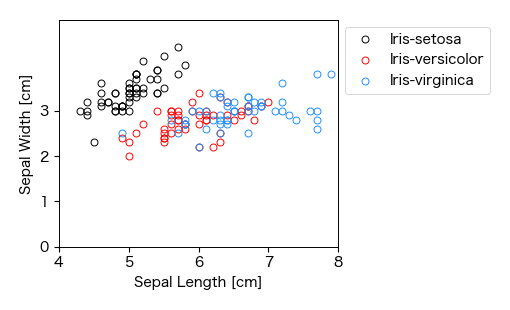

In [4]:
# 散布図（アヤメのがく片）
fig, ax = plt.subplots(figsize=(5, 3))
for spc in Iris['Species'].unique():
    x = Iris.loc[Iris['Species']==spc, 'Sepal Length']
    y = Iris.loc[Iris['Species']==spc, 'Sepal Width']
    ax.plot(x, y, 'o', mfc='None', label=spc)
ax.set_xlim(4, 8); ax.set_ylim(0, 5)
ax.set_yticks([0, 1, 2, 3])
ax.set_xlabel('Sepal Length [cm]'); ax.set_ylabel('Sepal Width [cm]')
ax.legend(fontsize=10, loc='upper left', frameon=True, bbox_to_anchor=(1.0, 1.0))
fig.savefig('./sepal_l-w.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

次に，花弁の長さ（Petal Length）を $X$ ，幅（Petal Width）を $Y$ として散布図を描いてみる．
今度は右上と左下の区画にデータ点が多く，右上がりの傾向がある．
すなわち，花弁が長くなれば，それとともに花弁の幅も大きくなる傾向がある．
また，アヤメの品種ごとに色分けすると，きれいに品種ごとに分かれることが分かる．

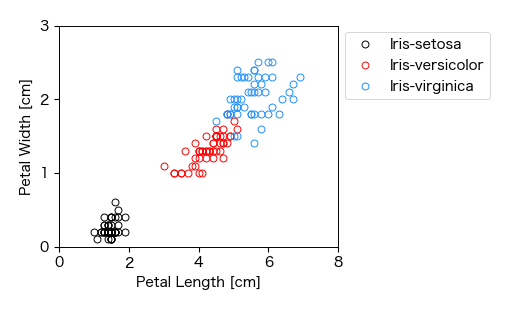

In [5]:
# 散布図（アヤメの花弁）
fig, ax = plt.subplots(figsize=(5, 3))
for spc in Iris['Species'].unique():
    x = Iris.loc[Iris['Species']==spc, 'Petal Length']
    y = Iris.loc[Iris['Species']==spc, 'Petal Width']
    ax.plot(x, y, 'o', mfc='None', label=spc)
ax.set_xlim(0, 8); ax.set_ylim(0, 3)
ax.set_yticks([0, 1, 2, 3])
ax.set_xlabel('Petal Length [cm]'); ax.set_ylabel('Petal Width [cm]')
ax.legend(fontsize=10, loc='upper left', frameon=True, bbox_to_anchor=(1.0, 1.0))
fig.savefig('./petal_l-w.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

### 共分散

変数 $ X,\ Y $ の散布図に右上がりや右下がりの傾向がある場合には， $ X $ と $ Y $ に**相関関係がある**という．
例えば，アヤメの花弁には，長さ（Petal Length）と幅（Petal Width）に相関関係がある．

相関関係を定量化するためには，散布図が右上がりのときに正，右下がりのときに負となるような統計量を考えれば良い．
このような統計量として，以下で定義される**共分散**がある：

$$
	s_{XY} = \frac{1}{n} \sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y}) = \overline{xy} - \bar{x}\bar{y}
$$(eq:covariance)

ただし，2つ目の等式には分散公式{eq}`eq:deviation2`を使った．

共分散の意味は以下の通りである．
まず，散布図の中心として，平均値 $ (\bar{x}, \bar{y}) $ を求める．
その上で，データ $ (x_{i}, y_{i}) $ に対し，平均値から $ X,\ Y $ 方向への増分（つまり偏差）の積 $ (x_{i}-\bar{x})(y_{i}-\bar{y}) $ を計算する．
この量は，データ $ (x_{i}, y_{i}) $ が平均値 $ (\bar{x}, \bar{y}) $ より右上か左下にあれば正，左上か右下にあれば負となる．
よって， $ (x_{i}-\bar{x})(y_{i}-\bar{y}) $ を全データに対して平均した量（共分散）は，データ全体が右上がりのときに正，右下がりのときに負となる．

なお， 同じ量同士の共分散は分散となる（例えば，$ X $ と $ X $ の共分散は $ X $ の分散となる）．

### 相関係数

共分散はデータ $ X,\ Y $ の単位やばらつきの度合いによって値がいくらでも大きくなってしまうため，相関の程度を一定の基準で表すことができない．
そこで，共分散を $ X,\ Y $ の標準偏差 $ s_{X},\ s_{Y} $ で割った量

$$
	r_{XY} = \frac{\displaystyle\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\displaystyle\sqrt{\frac{1}{n} \sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}\sqrt{\frac{1}{n} \sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}} = \frac{s_{XY}}{s_{X}s_{Y}}
$$(eq:correlation)

を考える．
分散公式{eq}`eq:deviation2`を用いた場合は以下のように表される：

$$
	r_{XY} = \frac{\overline{xy} - \bar{x}\bar{y}}{(\overline{x^{2}} - \bar{x}^{2})(\overline{y^{2}} - \bar{y}^{2})}
$$(eq:correlation2)

これを**ピアソンの相関係数**（あるいは単に相関関係）と呼ぶ．

相関係数は，データ $ X,\ Y $ の単位やばらつきに依らず，定義域が常に $ -1\leq r_{XY} \leq 1 $ となる．
特に，相関係数の符号は散布図が右上がりの場合に正，右下がりの場合に負となる．
一般に，相関係数が正の値のときに**正の相関**，負の値のときに**負の相関**があるという．
また，相関係数が0のときには**無相関**という．
相関係数が最大値1となるのは，同じデータ同士の場合である．

なお，相関係数はあくまでも２つの変数の散布図が直線的な関係になる場合だけ意味があることに注意しなければならない．
例えば，$ X,\ Y $の散布図が円状に分布する場合，２つの変数には何かしらの規則があると考えられるが，相関係数は0となり無相関と判断されてしまう．
このため，相関係数を調べる際には必ず散布図も併せて描く必要がある．

実際にアヤメデータから相関係数を求めてみる．
がく片については $ r_{XY} = -0.109 $ なのでほぼ無相関，花弁については $ r_{XY}=0.963 $ となるので強い正の相関があることが分かる．

In [6]:
# 相関係数（Pandasを用いる）
Iris.corr()

,Sepal Length,Sepal Width,Petal Length,Petal Width
Sepal Length,1.000,-0.109,0.872,0.818
Sepal Width,-0.109,1.000,-0.421,-0.357
Petal Length,0.872,-0.421,1.000,0.963
Petal Width,0.818,-0.357,0.963,1.000


## 相関関係と因果関係

2つの変数 $ X,\ Y $ の間に相関関係があったときに，それらの間に因果関係があるといえるだろうか？
つまり，$ X\Rightarrow Y $ または $ Y \Rightarrow X $ という関係が成り立つだろうか？
実は，これは必ずしも成り立つとは限らない．
その理由は，第一に，全くの偶然で強い相関関係が現れることがあるからである．
例えば，文献{cite}`中室2017`によると，以下の３つは全くの偶然で強い相関関係が現れた例である：
- 「ニコラス・ケイジの年間映画出演本数」と「プールの溺死者数」
- 「ミス・アメリカの年齢」と「暖房器具による死亡者数」
- 「商店街における総収入」と「アメリカでのコンピュータサイエンス博士号取得者数」

また，調べたい2つの変数 $ X,\ Y $ それぞれが別の変数 $ Z $ と強く相関する場合，$ X $ と $ Y $ の相関が見かけ上強くなってしまうこともある．
このような相関は**疑似相関**と呼ばれ，疑似相関の原因となる変数 $ Z $ のことを**第3の変数**と呼ぶ．
なお，第3の変数のデータは必ずしも手に入るとは限らないが，もし入手できていない場合は**潜在変数**と呼ぶ．
疑似相関では，$ Z \Rightarrow X $ および $ Z \Rightarrow Y $ という因果関係が成り立つが，$ X\Rightarrow Y $ または $ Y \Rightarrow X $ という因果関係は成り立たない．
疑似相関の例は数多く存在するが，例えば，「子供の体力」と「子供の学力」の強い相関関係は疑似相関の典型例である．
この場合，第3の変数は「親の教育熱心さ」であり，親が教育熱心であれば当然学力が高い傾向にあり，また子供にスポーツを習わせるので体力も上がる傾向があるということになる．

第3の変数の影響を除く方法はいくつか知られている．

**1. 第3の変数による層別**

1つ目は第3の変数による層別の方法である．
これは，第3の変数の値が近いものだけでいくつかのグループに分け，グループ内で相関を見る方法である．

**2. 第3の変数の単位あたりの量に変換する**

2つ目は変数 $X,\ Y$ を第3の変数 $ Z $ で割って，第3の変数の単位あたりの量に変換する方法である．
例えば，第3の変数が人口の場合，人口１人あたりの $ X,\ Y $ に変換し，これらの相関を見ることで正しい相関関係を調べることができる．

**3. 偏相関係数を用いる**

3つ目は**偏相関係数**を用いる方法である．
偏相関係数とは，関係を調べたい2つの変数 $X,\ Y$ に対して別の変数 $ Z $ の影響を取り除いた上で求めた相関係数である．
いま，$ (x_{1}, y_{1}), \ldots, (x_{n}, y_{n}) $ に対して $ (z_{1}, \ldots, z_{n}) $ の影響を除いた相関係数を考えたい．
これには，以下のように回帰直線の考え方を使う．
まず，$ Z $ による $ X $ の予測値を $ \hat{x}_{i} = a z_{i} + b $ として，最小二乗法によって $ a,\ b $ を求める．
このとき，$ Z $ の影響を除いた $ X $ を $ \tilde{X} $ とすると，これは残差 $ \tilde{x}_{i} = x_{i} - \hat{x}_{i} $ によって与えられる．
同様にして，$ Z $ の影響を除いた $ Y $ を $ \tilde{Y} $ とすると，これは予測値 $ \hat{y}_{i} = c z_{i} + d $ に対して，残差 $ \tilde{y}_{i} = y_{i} - \hat{y}_{i} $ によって与えられる．
このようにして，$ Z $ の影響を除いた $ \tilde{X}, \tilde{Y} $ のデータ $ (\tilde{x}_{i}, \tilde{y}_{i})=(x_{i}-\hat{x}_{i}, y_{i}-\hat{y}_{i}) $ が得られる．
偏相関係数は $ Z $ の影響を除いた $ \tilde{X}, \tilde{Y} $ の相関係数 $ r_{\tilde{X}, \tilde{Y}} $ として定義されるが，実は $ r_{\tilde{X}, \tilde{Y}} $ は以下のように変数 $ X,\ Y,\ Z $ に対する通常の相関係数から求めることができる：

$$
	r_{\tilde{X}, \tilde{Y}} = \frac{r_{XY} - r_{XZ} r_{YZ}}{\sqrt{(1-r_{XZ}^{2})(1-r_{YZ}^{2})}}
$$(eq:tpartial_correlation)

証明には次節で扱う最小二乗法が必要となるので省略する（[ここ](https://manabitimes.jp/math/1400)を参照）．

なお，第３の変数を取り除いた結果相関がなくなれば，それは擬似相関であり，2変数間に因果関係がないことが分かる．
一方，第３の変数を取り除いても相関が大きいままの場合，相関関係が成立する可能性は高くなるが，２変数間に因果関係があるかについては何も言えないことに注意する．
すなわち，偏相関係数が大きくてもそれが因果関係の存在を意味するわけではない．
また，第３の変数の影響によって見かけ上相関が発生する疑似相関とは逆に，第３の変数の影響によって見かけ上無相関となる**疑似無相関**も存在する．

## 実例：警察職員数と刑法犯認知件数の関係 {cite}`竹村2019`

### STEP1: Problem
- ある統計によると，警察官の数と犯罪の件数には正の相関があると言われている．
- では，これらの間に因果関係はあるだろうか？

### STEP2, 3: Plan, Data

- 都道府県別の警察職員数と刑法犯認知件数のデータを用い，これらの相関関係および因果関係の有無を調べることにする．
- 今回用いるデータは以下の通りである：
    - 都道府県別の刑法犯認知件数
        - [H27年，都道府県別刑法犯の認知件数，検挙件数，検挙人員](https://www.npa.go.jp/hakusyo/h27/data.html)
    - 都道府県別の警察職員数
        - [H27年，地方公共団体定員管理関係](https://www.soumu.go.jp/main_sosiki/jichi_gyousei/c-gyousei/teiin/109981data.html)
     - 都道府県別の人口
         - [住民基本台帳に基づく人口，人口動態及び世帯数調査](https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00200241&tstat=000001039591&cycle=7&year=20150&month=0&tclass1=000001039601&result_back=1&tclass2val=0)

### STEP4: Analysis

In [2]:
# データの読み込み
Crime = pd.read_csv('./number_crime.csv', index_col='p')

- 下図は2015年度の都道府県別警察職員数（$ X $）と刑法犯認知件数（$ Y $）の散布図を表している．
- この散布図を見ると確かに両者には正の相関関係があり，以下のように相関係数も大きくなる

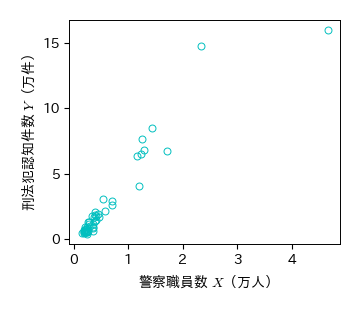

In [16]:
fig, ax = plt.subplots()
ax.plot(Crime['警察職員数']/10000, Crime['刑法犯認知件数']/10000, 'co', mfc='None')
ax.set_xticks([0, 1, 2, 3, 4]); ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel('警察職員数 $X$（万人）')
ax.set_ylabel('刑法犯認知件数 $Y$（万件）')
fig.savefig('./police_crime.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [6]:
# 相関係数
Crime.corr()['刑法犯認知件数']['警察職員数']

0.9424697256476458

- では，このことから警察職員数（$ X $）と刑法犯認知件数（$ Y $）に因果関係があるといえるだろうか？
- これを調べるため，以下では都道府県の人口を第3の変数 $ Z $ と仮定し，警察職員数（$ X $）と刑法犯認知件数（$ Y $）の関係が疑似相関であるか調べる．

**実習：人口との散布図**
- 刑法犯認知件数（$ X $）と警察職員数（$ Y $）のそれぞれについて人口（$ Z $）との散布図を描け．
- これらの散布図の相関係数を求め，それが何を意味するか考察せよ．

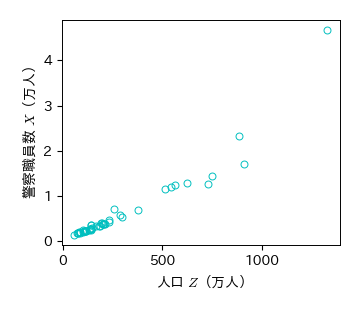

In [19]:
# 警察職員数（X）と人口（Z）の散布図
fig, ax = plt.subplots()
ax.plot(Crime['人口']/10000, Crime['警察職員数']/10000, 'co', mfc='None')
ax.set_xticks([0, 500, 1000]); ax.set_yticks([0, 1, 2, 3, 4])
ax.set_xlabel('人口 $Z$（万人）')
ax.set_ylabel('警察職員数 $X$（万人）')
fig.savefig('./pop_police.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [20]:
# 警察職員数（X）と人口（Z）の相関係数
Crime.corr()['人口']['警察職員数']

0.9478341323186453

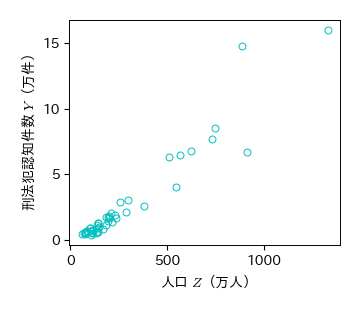

In [ ]:
# 刑法犯認知件数（Y）と人口（Z）の散布図
fig, ax = plt.subplots()
ax.plot(Crime['人口']/10000, Crime['刑法犯認知件数']/10000, 'co', mfc='None')
ax.set_xticks([0, 500, 1000]); ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel('人口 $Z$（万人）')
ax.set_ylabel('刑法犯認知件数 $Y$（万件）')
fig.savefig('./pop_crime.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [21]:
# 刑法犯認知件数（Y）と人口（Z）の相関係数
Crime.corr()['人口']['刑法犯認知件数']

0.9576469769539209

**実習：人口の影響を取り除く方法**
- 刑法犯認知件数と警察職員数の散布図について，人口が100万人未満，100万人以上200万人未満，200万人以上500万人未満で層別し，結果を考察せよ．
- 人口1000人あたりの警察職員数と刑法犯罪認知件数に関する散布図を描いてその相関係数を求め，結果を考察せよ．
- 人口の影響を除いた警察職員数と刑法犯認知件数の偏相関係数を求め，結果を考察せよ．

In [14]:
cnd1 = (Crime['人口'] <  1000000)
cnd2 = (Crime['人口'] >= 1000000) & (Crime['人口'] < 2000000)
cnd3 = (Crime['人口'] >= 2000000) & (Crime['人口'] < 5000000)

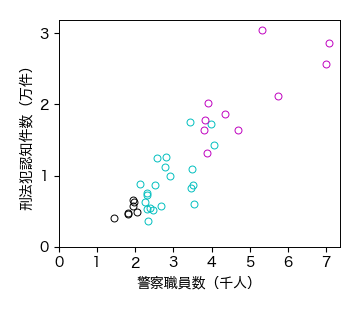

In [15]:
# 層別散布図
fig, ax = plt.subplots()
ax.plot(Crime.loc[cnd1, '警察職員数']/1000, Crime.loc[cnd1, '刑法犯認知件数']/10000, 'ko', mfc='None')
ax.plot(Crime.loc[cnd2, '警察職員数']/1000, Crime.loc[cnd2, '刑法犯認知件数']/10000, 'co', mfc='None')
ax.plot(Crime.loc[cnd3, '警察職員数']/1000, Crime.loc[cnd3, '刑法犯認知件数']/10000, 'mo', mfc='None')
ax.set_xticks([0, 1, 2, 3, 4, 5, 6, 7]); ax.set_yticks([0, 1, 2, 3])
ax.set_xlabel('警察職員数（千人）')
ax.set_ylabel('刑法犯認知件数（万件）')
fig.savefig('./police_crime2.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

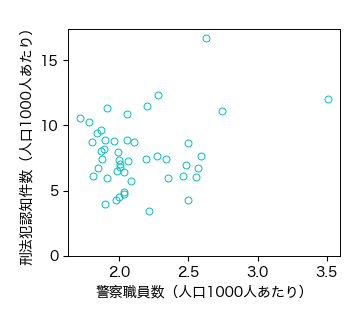

In [16]:
# 人口1000人あたりの散布図
fig, ax = plt.subplots()
ax.plot(1000*Crime['警察職員数']/Crime['人口'], 1000*Crime['刑法犯認知件数']/Crime['人口'], 'co', mfc='None')
ax.set_xticks([2, 2.5, 3, 3.5]); ax.set_yticks([0, 5, 10, 15])
ax.set_xlabel('警察職員数（人口1000人あたり）')
ax.set_ylabel('刑法犯認知件数（人口1000人あたり）')
fig.savefig('./police_crime3.png', bbox_inches="tight", pad_inches=0.2, transparent=False, dpi=300) # 保存

In [17]:
# 偏相関係数
r = Crime.corr()
cov = r['警察職員数']['刑法犯認知件数'] - r['警察職員数']['人口']*r['刑法犯認知件数']['人口']
denom = np.sqrt((1-r['警察職員数']['人口']**2)*(1-r['刑法犯認知件数']['人口']**2))
cov / denom

0.379

### STEP 5: Conclusion

**実習**
- 解析の結果から，警察職員数と刑法犯認知件数の間に因果関係があるかどうか考察せよ．